In [43]:
pathShippingData = 'ShippingLogs1.csv'
pathProductDescription = 'ProductDescriptions.csv'

In [68]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df_shipping = pd.read_csv(pathShippingData)
df_product_des = pd.read_csv(pathProductDescription)

df_shipping

,ActualShippingDays,ExpectedShippingDays,Carrier,YShippingDistance,XShippingDistance,InBulkOrder,ShippingOrigin,OrderDate,ProductId,ShippingPriority,OnTimeDelivery,ProductId.1
0,11,11,GlobalFreight,100,-44,Bulk Order,Atlanta,9/11/20,e6eeeb9c-efe6-48db-b504-90447261f003,Express,On Time,b35af302-9875-4471-8464-9d2645c27a4d
1,15,15,MicroCarrier,18,-154,Single Order,Seattle,6/22/21,d1ebdb54-7334-4217-a4a5-ea8a859e14c2,Standard,On Time,b35af302-9875-4471-8464-9d2645c27a4d
2,13,12,GlobalFreight,-14,-389,Bulk Order,Chicago,12/25/20,f9e3549a-da76-4462-b4bc-facaa3644aec,Ground,On Time,b35af302-9875-4471-8464-9d2645c27a4d
3,17,16,Shipper,301,-13,Single Order,San Francisco,7/6/21,7dab66a8-b20e-4819-93a3-39ff05e144b3,Ground,On Time,b35af302-9875-4471-8464-9d2645c27a4d
4,17,16,Shipper,118,89,Single Order,San Francisco,4/3/21,2986e9bc-d8ea-4211-9ca3-78bea4d27485,Ground,On Time,b35af302-9875-4471-8464-9d2645c27a4d
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,17,14,BigBird,-32,125,Single Order,San Francisco,8/28/21,97925d0e-2cbd-4f6b-954e-fbc0ee0a0311,Express,Late,c1e69a69-3373-4e7a-9e54-96b5f9babb22
9996,17,16,BigBird,30,-185,Single Order,Atlanta,10/23/21,2ff9d656-c144-4a23-b026-e83bdf416578,Ground,On Time,c1e69a69-3373-4e7a-9e54-96b5f9babb22
9997,19,15,MicroCarrier,-11,268,Single Order,Chicago,11/3/21,80185fbd-5c19-4675-a482-d1f367d6cbb1,Standard,Late,c1e69a69-3373-4e7a-9e54-96b5f9babb22
9998,13,13,BigBird,-77,-95,Single Order,New York City,9/1/21,27abc538-3a19-4636-9017-6fd36c72fecd,Express,On Time,c1e69a69-3373-4e7a-9e54-96b5f9babb22


In [47]:
df = df_shipping.set_index('ProductId').join(df_product_des.set_index('ProductId'))


In [52]:
df.shape

(10000, 15)

In [53]:
df.describe

<bound method NDFrame.describe of                                       ActualShippingDays  \
ProductId                                                  
e6eeeb9c-efe6-48db-b504-90447261f003                  11   
d1ebdb54-7334-4217-a4a5-ea8a859e14c2                  15   
f9e3549a-da76-4462-b4bc-facaa3644aec                  13   
7dab66a8-b20e-4819-93a3-39ff05e144b3                  17   
2986e9bc-d8ea-4211-9ca3-78bea4d27485                  17   
...                                                  ...   
97925d0e-2cbd-4f6b-954e-fbc0ee0a0311                  17   
2ff9d656-c144-4a23-b026-e83bdf416578                  17   
80185fbd-5c19-4675-a482-d1f367d6cbb1                  19   
27abc538-3a19-4636-9017-6fd36c72fecd                  13   
541e208f-0b96-4797-a866-4784c50ef8e1                  21   

                                      ExpectedShippingDays        Carrier  \
ProductId                                                                   
e6eeeb9c-efe6-48db-b504-9044726

In [54]:
df['diffInShipping'] = df['ActualShippingDays']-df['ExpectedShippingDays']

In [55]:
df['diffInShipping'].shape

(10000,)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, e6eeeb9c-efe6-48db-b504-90447261f003 to 541e208f-0b96-4797-a866-4784c50ef8e1
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ActualShippingDays    10000 non-null  int64  
 1   ExpectedShippingDays  10000 non-null  int64  
 2   Carrier               10000 non-null  object 
 3   YShippingDistance     10000 non-null  int64  
 4   XShippingDistance     10000 non-null  int64  
 5   InBulkOrder           10000 non-null  object 
 6   ShippingOrigin        10000 non-null  object 
 7   OrderDate             10000 non-null  object 
 8   ShippingPriority      10000 non-null  object 
 9   OnTimeDelivery        10000 non-null  object 
 10  ProductId.1           10000 non-null  object 
 11  ComputerBrand         0 non-null      object 
 12  ComputerModel         0 non-null      object 
 13  ScreenSize            0 non-null      float64
 14  PackageWe

In [58]:
df.drop_duplicates()

,ActualShippingDays,ExpectedShippingDays,Carrier,YShippingDistance,XShippingDistance,InBulkOrder,ShippingOrigin,OrderDate,ShippingPriority,OnTimeDelivery,ProductId.1,ComputerBrand,ComputerModel,ScreenSize,PackageWeight,diffInShipping
ProductId,,,,,,,,,,,,,,,,
e6eeeb9c-efe6-48db-b504-90447261f003,11,11,GlobalFreight,100,-44,Bulk Order,Atlanta,9/11/20,Express,On Time,b35af302-9875-4471-8464-9d2645c27a4d,NaN,NaN,NaN,NaN,0
d1ebdb54-7334-4217-a4a5-ea8a859e14c2,15,15,MicroCarrier,18,-154,Single Order,Seattle,6/22/21,Standard,On Time,b35af302-9875-4471-8464-9d2645c27a4d,NaN,NaN,NaN,NaN,0
f9e3549a-da76-4462-b4bc-facaa3644aec,13,12,GlobalFreight,-14,-389,Bulk Order,Chicago,12/25/20,Ground,On Time,b35af302-9875-4471-8464-9d2645c27a4d,NaN,NaN,NaN,NaN,1
7dab66a8-b20e-4819-93a3-39ff05e144b3,17,16,Shipper,301,-13,Single Order,San Francisco,7/6/21,Ground,On Time,b35af302-9875-4471-8464-9d2645c27a4d,NaN,NaN,NaN,NaN,1
2986e9bc-d8ea-4211-9ca3-78bea4d27485,17,16,Shipper,118,89,Single Order,San Francisco,4/3/21,Ground,On Time,b35af302-9875-4471-8464-9d2645c27a4d,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97925d0e-2cbd-4f6b-954e-fbc0ee0a0311,17,14,BigBird,-32,125,Single Order,San Francisco,8/28/21,Express,Late,c1e69a69-3373-4e7a-9e54-96b5f9babb22,NaN,NaN,NaN,NaN,3
2ff9d656-c144-4a23-b026-e83bdf416578,17,16,BigBird,30,-185,Single Order,Atlanta,10/23/21,Ground,On Time,c1e69a69-3373-4e7a-9e54-96b5f9babb22,NaN,NaN,NaN,NaN,1
80185fbd-5c19-4675-a482-d1f367d6cbb1,19,15,MicroCarrier,-11,268,Single Order,Chicago,11/3/21,Standard,Late,c1e69a69-3373-4e7a-9e54-96b5f9babb22,NaN,NaN,NaN,NaN,4


In [63]:
df['year'] = pd.DatetimeIndex(df['OrderDate']).year

In [64]:
df['month'] = pd.DatetimeIndex(df['OrderDate']).month

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ActualShippingDays,10000.0,14.4423,3.393527,0.0,12.0,15.0,16.0,28.0
ExpectedShippingDays,10000.0,13.2514,2.213659,1.0,12.0,14.0,15.0,22.0
YShippingDistance,10000.0,-0.0466,126.615258,-476.0,-82.0,-7.0,82.0,537.0
XShippingDistance,10000.0,0.1734,127.167781,-436.0,-82.0,7.0,82.0,458.0
ScreenSize,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PackageWeight,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diffInShipping,10000.0,1.1909,2.070431,-1.0,0.0,0.0,2.0,10.0
year,10000.0,2020.5013,0.500023,2020.0,2020.0,2021.0,2021.0,2021.0
month,10000.0,6.5544,3.458242,1.0,4.0,7.0,10.0,12.0


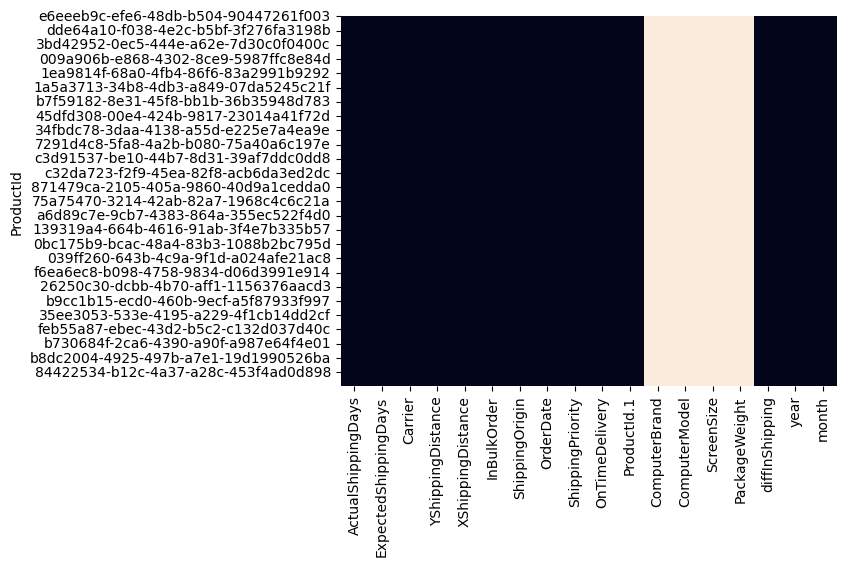

In [70]:
result = sns.heatmap(df.isnull(),cbar=False)

<AxesSubplot:>

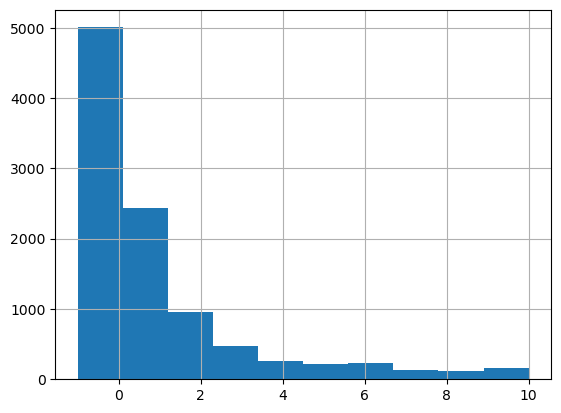

In [72]:
df.diffInShipping.hist()

/Users/govindasatyanarayanabandaru/opt/anaconda3/envs/5156/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/govindasatyanarayanabandaru/opt/anaconda3/envs/5156/lib/python3.10/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/govindasatyanarayanabandaru/opt/anaconda3/envs/5156/lib/python3.10/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


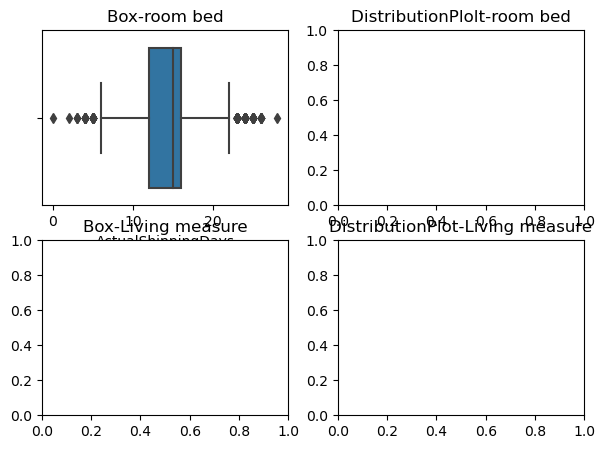

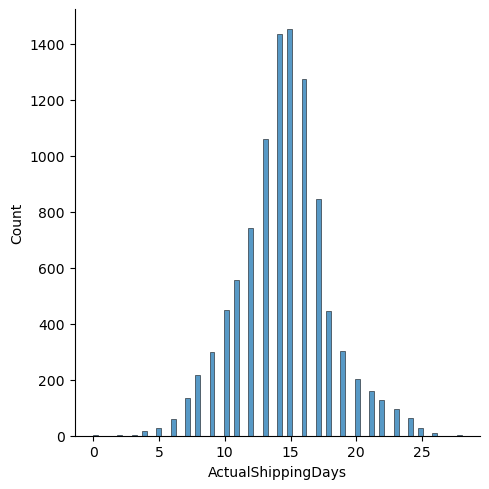

In [74]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
axes[0,0].set_title('Box-room bed')
axes[0,1].set_title('DistributionPlolt-room bed')
axes[1,0].set_title('Box-Living measure')
axes[1,1].set_title('DistributionPlot-Living measure')

sns.boxplot(df.ActualShippingDays, orient='v',ax = axes[0,0])
sns.displot(df.ActualShippingDays,ax= axes[0,1])

In [75]:
df.to_csv('formatted_dataset_shipping.csv')